# **<span style='color:black'>ANALYSE DES VENTES DE LA LIBRAIRIE LAPAGE</span>**

In [1]:
# Import des librairies Python
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import scipy as sc
import seaborn as sns
from datetime import datetime, date
import plotly.express as px
import scipy.stats as st
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# Import des fichiers
customers=pd.read_csv('customers.csv')
products=pd.read_csv('products.csv')
transactions=pd.read_csv('transactions.csv')

# **<span style='color:blue'>I. NETTOYAGE DES FICHIERS ET CREATION DU DATAFRAME</span>**

# **<span style='color:black'>Fichier customers</span>**

In [3]:
customers.head(), customers.shape

(  client_id sex  birth
 0    c_4410   f   1967
 1    c_7839   f   1975
 2    c_1699   f   1984
 3    c_5961   f   1962
 4    c_5320   m   1943,
 (8623, 3))

In [4]:
customers.describe(include='all')

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_1224,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


In [5]:
customers.info

<bound method DataFrame.info of      client_id sex  birth
0       c_4410   f   1967
1       c_7839   f   1975
2       c_1699   f   1984
3       c_5961   f   1962
4       c_5320   m   1943
...        ...  ..    ...
8618    c_7920   m   1956
8619    c_7403   f   1970
8620    c_5119   m   1974
8621    c_5643   f   1968
8622      c_84   f   1982

[8623 rows x 3 columns]>

In [6]:
customers.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

# **<span style='color:black'>Fichier products</span>**

In [7]:
products.head(), products.shape

(  id_prod  price  categ
 0  0_1421  19.99      0
 1  0_1368   5.13      0
 2   0_731  17.99      0
 3   1_587   4.99      1
 4  0_1507   3.99      0,
 (3287, 3))

In [8]:
products.describe(include='all')

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_835,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


<AxesSubplot:xlabel='price'>

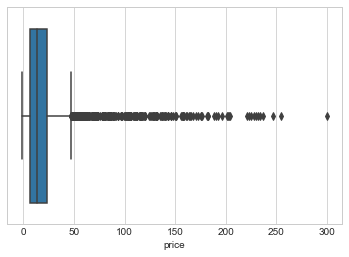

In [9]:
# boxplot  pour valeurs abérrantes => on se rend compte qu'il y a un produit négatif, on regardera de plus près
sns.boxplot(x=products['price'])

In [10]:
products[products['price']<0]

,id_prod,price,categ
731,T_0,-1.0,0


In [11]:
#J'ai découvert qu'il y avait un produit dont le prix était iférieur à zéro
#Après vérification, je soupçonne qu'il s'agit d'un produit test utilisé par les informaticiens du site
# Je décide de ne pas considérer cette ligne 
products= products[products['price']>0]
products.describe(include='all')

,id_prod,price,categ
count,3286,3286.000000,3286.000000
unique,3286,NaN,NaN
top,0_835,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.863597,0.370359
std,NaN,29.849786,0.615446
min,NaN,0.620000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.075000,0.000000
75%,NaN,22.990000,1.000000


In [12]:
products.info

<bound method DataFrame.info of      id_prod   price  categ
0     0_1421   19.99      0
1     0_1368    5.13      0
2      0_731   17.99      0
3      1_587    4.99      1
4     0_1507    3.99      0
...      ...     ...    ...
3282    2_23  115.99      2
3283   0_146   17.14      0
3284   0_802   11.22      0
3285   1_140   38.56      1
3286  0_1920   25.16      0

[3286 rows x 3 columns]>

In [13]:
products.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

# **<span style='color:black'>Fichier transactions</span>**

In [14]:
transactions.head(), transactions.shape

(  id_prod                        date session_id client_id
 0  0_1518  2022-05-20 13:21:29.043970   s_211425     c_103
 1   1_251  2022-02-02 07:55:19.149409   s_158752    c_8534
 2  0_1277  2022-06-18 15:44:33.155329   s_225667    c_6714
 3   2_209  2021-06-24 04:19:29.835891    s_52962    c_6941
 4  0_1509  2023-01-11 08:22:08.194479   s_325227    c_4232,
 (679532, 4))

In [15]:
transactions.describe()

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


In [16]:
#Le nombre unique d'id_prod  dans le fichier transaction est inférieur au nombre id_prod dans le fichier products,
#On peut donc conclure qu'il y a des produits qui n'ont pas fait l'objet de transactions.

#Le nombre de client_id  dans le fichier transaction est également inférieur au nombre de client_id dans le fichier customers
#Je vais creuser pour comprendre le delta entre les deux

#Je vois qu'il y a un format de date avec le préfix 'test', probablement des test de l'équipe technique, je vais creuser pour moeiux comprendre

In [17]:
transactions.info

<bound method DataFrame.info of        id_prod                        date session_id client_id
0       0_1518  2022-05-20 13:21:29.043970   s_211425     c_103
1        1_251  2022-02-02 07:55:19.149409   s_158752    c_8534
2       0_1277  2022-06-18 15:44:33.155329   s_225667    c_6714
3        2_209  2021-06-24 04:19:29.835891    s_52962    c_6941
4       0_1509  2023-01-11 08:22:08.194479   s_325227    c_4232
...        ...                         ...        ...       ...
679527  0_1551  2022-01-15 13:05:06.246925   s_150195    c_8489
679528   1_639  2022-03-19 16:03:23.429229   s_181434    c_4370
679529  0_1425  2022-12-20 04:33:37.584749   s_314704     c_304
679530  0_1994  2021-07-16 20:36:35.350579    s_63204    c_2227
679531   1_523  2022-09-28 01:12:01.973763   s_274568    c_3873

[679532 rows x 4 columns]>

In [18]:
transactions.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [19]:
transactions_test=transactions[transactions['date'].str.contains('test')]
print(transactions_test)

       id_prod                             date session_id client_id
3019       T_0  test_2021-03-01 02:30:02.237419        s_0      ct_0
5138       T_0  test_2021-03-01 02:30:02.237425        s_0      ct_0
9668       T_0  test_2021-03-01 02:30:02.237437        s_0      ct_1
10728      T_0  test_2021-03-01 02:30:02.237436        s_0      ct_0
15292      T_0  test_2021-03-01 02:30:02.237430        s_0      ct_0
...        ...                              ...        ...       ...
657830     T_0  test_2021-03-01 02:30:02.237417        s_0      ct_0
662081     T_0  test_2021-03-01 02:30:02.237427        s_0      ct_1
670680     T_0  test_2021-03-01 02:30:02.237449        s_0      ct_1
671647     T_0  test_2021-03-01 02:30:02.237424        s_0      ct_1
679180     T_0  test_2021-03-01 02:30:02.237425        s_0      ct_1

[200 rows x 4 columns]


In [20]:
transactions_test.describe()

,id_prod,date,session_id,client_id
count,200,200,200,200
unique,1,39,1,2
top,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
freq,200,13,200,106


Ici on peut voir que 200 lignes correspondent aux tests effectués par les informaticiens 
Les produits sont liés aux mêmes id_client et id_prod, les 200 lignes concernent le même produits T_0, la même session s_0, et le même id client ct_0 et ct_1.

In [21]:
#Supression 
transactions= transactions[transactions['id_prod']!='T_0']
transactions[transactions['id_prod']=='T_0']

,id_prod,date,session_id,client_id


In [22]:
customers= customers[(customers['client_id']!='ct_0')&(customers['client_id']!='ct_1')]
customers[customers['client_id']=='ct_0']

,client_id,sex,birth


# **<span style='color:black'>Elaboration de la table </span>**

Client_id est une bonne clé pour le fichier customers puisqu'il y a 8621 valeurs uniques sur 8621 valeurs au total (cf .describe() plus haut)
id_prod est une bonne clé pour le fichier products puisqu'il y a 3286 valeurs uniques sur 3286 valeurs au total (cf .describe() plus haut)
La création d'un dataframe duplicate, afin de vérifier l'unicité des transacations, montre que les 679332 transactions répertoriées sont uniques
Ces vérifications faites on peut faire les jointures, on souhaite conserver toutes les informations présentes dans tab et les lier à celles présentes dans les deux autres dataframes. id_prod et client_id pourront être répétés plusieurs fois dans Transactions mais certains produits peuvent ne jamais avoir été vendus où certains clients peuvent ne jamais avoir effectué d'achats on souhaite pourtant conserver leurs informations. On fera une jointure 'merge'. On s'attend donc à avoir in fine un dataframe avec 679332 lignes minimum (+ produits jamais vendus et clients non acheteurs). Il peut s'agir de clients n'achetant pas sur plusieurs sessions.

In [23]:
tran_cust= pd.merge(transactions, customers, on='client_id', how='left', indicator=True)
tran_cust

,id_prod,date,session_id,client_id,sex,birth,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,both
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,both
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,both
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,both
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,both
...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,f,1951,both
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,f,1977,both
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,f,1988,both
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,m,1986,both


In [24]:
tran_cust['_merge'].unique()

['both']
Categories (1, object): ['both']

Je constate que la jointure à bien fonctionnée. Chaque éléments du fichier customers a trouvé son élément dans le fichier transaction. 

In [25]:
#Vérification des valeurs nulles
tran_cust.isnull().sum(), tran_cust.shape

(id_prod       0
 date          0
 session_id    0
 client_id     0
 sex           0
 birth         0
 _merge        0
 dtype: int64,
 (679332, 7))

In [26]:
tran_cust.drop(columns=['_merge'], inplace=True)
tran_cust.head()

,id_prod,date,session_id,client_id,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980


In [27]:
tran_cust_prod=pd.merge(tran_cust, products, on='id_prod', how='left', indicator=True)
tran_cust_prod

,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,4.18,0.0,both
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,15.99,1.0,both
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,7.99,0.0,both
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,69.99,2.0,both
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,4.99,0.0,both
...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,f,1951,12.99,0.0,both
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,f,1977,10.99,1.0,both
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,f,1988,12.99,0.0,both
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,m,1986,4.98,0.0,both


In [28]:
tran_cust_prod['_merge'].unique()

['both', 'left_only']
Categories (2, object): ['both', 'left_only']

In [29]:
tran_cust_prod.isnull().sum(), tran_cust.shape

(id_prod         0
 date            0
 session_id      0
 client_id       0
 sex             0
 birth           0
 price         221
 categ         221
 _merge          0
 dtype: int64,
 (679332, 6))

In [30]:
voir_equipe = tran_cust_prod.loc[tran_cust_prod['_merge']=='left_only']
voir_equipe

,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,m,1940,NaN,NaN,left_only
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,f,1963,NaN,NaN,left_only
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,m,1978,NaN,NaN,left_only
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,m,1991,NaN,NaN,left_only
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,m,1973,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...
669533,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,m,1981,NaN,NaN,left_only
670484,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,f,1979,NaN,NaN,left_only
671088,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,m,1981,NaN,NaN,left_only
675480,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,m,1986,NaN,NaN,left_only


In [31]:
voir_equipe.describe(include='all')

,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
count,221,221,221,221,221,221.000000,0.0,0.0,221
unique,1,221,221,100,2,NaN,NaN,NaN,1
top,0_2245,2023-02-10 11:54:44.891532,s_342683,c_1533,f,NaN,NaN,NaN,left_only
freq,221,1,1,6,117,NaN,NaN,NaN,221
mean,NaN,NaN,NaN,NaN,NaN,1977.782805,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,10.837556,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1933.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1973.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,1979.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,1984.000000,NaN,NaN,NaN


221 transactions, dans lesquelles la jointure n'a pas fonctionnée, 


In [32]:
products[products['id_prod']=='0_2245']

,id_prod,price,categ


In [33]:
transactions[transactions['id_prod']=='0_2245']

,id_prod,date,session_id,client_id
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746
10106,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713
11727,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108
15675,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391
16377,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954
...,...,...,...,...
669730,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131
670682,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167
671286,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453
675679,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098


In [34]:
#On remarque que le produit 0_2245 correspondnat aux   221 transactions n'existe pas dans le fichier products, on va donc  rajouter
products=products.append({'id_prod' : '0_2245' , 'price' : 10.63, 'categ' :0} , ignore_index=True)

In [35]:
#Vérification de l'ajout
products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,0_146,17.14,0
3283,0_802,11.22,0
3284,1_140,38.56,1
3285,0_1920,25.16,0


In [36]:
tab=pd.merge(tran_cust, products, on='id_prod', how='left', indicator=True)
tab

,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,4.18,0,both
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,15.99,1,both
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,7.99,0,both
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,69.99,2,both
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,4.99,0,both
...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,f,1951,12.99,0,both
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,f,1977,10.99,1,both
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,f,1988,12.99,0,both
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,m,1986,4.98,0,both


In [37]:
tab['_merge'].unique()

['both']
Categories (1, object): ['both']

In [38]:
tab = tab.loc[tab['_merge']=='both']
tab

,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,4.18,0,both
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,15.99,1,both
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,7.99,0,both
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,69.99,2,both
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,4.99,0,both
...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,f,1951,12.99,0,both
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,f,1977,10.99,1,both
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,f,1988,12.99,0,both
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,m,1986,4.98,0,both


In [39]:
tab = tab.copy()
tab.drop(columns=['_merge'], inplace=True)
tab

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,4.18,0
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,15.99,1
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,7.99,0
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,69.99,2
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,4.99,0
...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,f,1951,12.99,0
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,f,1977,10.99,1
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,f,1988,12.99,0
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,m,1986,4.98,0


In [40]:
tab['date_2'] = pd.to_datetime(tab['date']).dt.date
tab['time'] = pd.to_datetime(tab['date']).dt.time
tab['years'] = pd.to_datetime(tab['date']).dt.year
tab['month'] = pd.to_datetime(tab['date']).dt.month
tab['month_year']=pd.to_datetime(tab['date']).dt.strftime("%m-%Y")
tab['age']= 2022-(tab['birth'])
tab

,id_prod,date,session_id,client_id,sex,birth,price,categ,date_2,time,years,month,month_year,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,4.18,0,2022-05-20,13:21:29.043970,2022,5,05-2022,36
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,15.99,1,2022-02-02,07:55:19.149409,2022,2,02-2022,34
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,7.99,0,2022-06-18,15:44:33.155329,2022,6,06-2022,54
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,69.99,2,2021-06-24,04:19:29.835891,2021,6,06-2021,22
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,4.99,0,2023-01-11,08:22:08.194479,2023,1,01-2023,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,f,1951,12.99,0,2022-01-15,13:05:06.246925,2022,1,01-2022,71
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,f,1977,10.99,1,2022-03-19,16:03:23.429229,2022,3,03-2022,45
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,f,1988,12.99,0,2022-12-20,04:33:37.584749,2022,12,12-2022,34
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,m,1986,4.98,0,2021-07-16,20:36:35.350579,2021,7,07-2021,36


In [41]:
#Changement des 221 produits 0_2245 par la moyenne de la catégorie : 10.63
tab =tab.fillna({'price': 10.63})

# **<span style='color:black'>Calculs des moyennes et CA </span>**

In [42]:
#calcul des  moyennes de prix par  categorie 
tab.groupby('categ').mean()

,birth,price,years,month,age
categ,,,,,
0,1978.102384,10.638184,2021.651814,6.553743,43.897616
1,1974.348762,20.485730,2021.702094,6.442758,47.651238
2,1996.051969,76.207412,2021.686731,6.325165,25.948031


In [43]:
#calcul du CA total
ca_total=tab["price"].sum()
print('Le CA total est :',ca_total)

Le CA total est : 11856077.910000002


In [44]:
#calcul du CA total/années
ca_annee=tab.groupby(['categ','month_year']).agg({'price':'sum'})
ca_annee=ca_annee.reset_index('categ')
ca_annee.rename(columns={'price':'ca'}, inplace=True)
ca_annee

,categ,ca
month_year,,
01-2022,0,164263.66
01-2023,0,181357.47
02-2022,0,183314.26
02-2023,0,162531.41
03-2021,0,193724.84
...,...,...
10-2022,2,120878.94
11-2021,2,107347.78
11-2022,2,111642.60


In [45]:
ca_annee2=tab.groupby(['date_2']).agg({'price':'sum'})
ca_annee2=ca_annee2.reset_index()
ca_annee2.rename(columns={'price':'ca'}, inplace=True)
ca_annee2

,date_2,ca
0,2021-03-01,16575.85
1,2021-03-02,15497.08
2,2021-03-03,15198.69
3,2021-03-04,15196.07
4,2021-03-05,17471.37
...,...,...
725,2023-02-24,15207.89
726,2023-02-25,15761.25
727,2023-02-26,16304.72
728,2023-02-27,19170.81


In [46]:
ca_annee.index

Index(['01-2022', '01-2023', '02-2022', '02-2023', '03-2021', '03-2022',
       '04-2021', '04-2022', '05-2021', '05-2022', '06-2021', '06-2022',
       '07-2021', '07-2022', '08-2021', '08-2022', '09-2021', '09-2022',
       '10-2021', '10-2022', '11-2021', '11-2022', '12-2021', '12-2022',
       '01-2022', '01-2023', '02-2022', '02-2023', '03-2021', '03-2022',
       '04-2021', '04-2022', '05-2021', '05-2022', '06-2021', '06-2022',
       '07-2021', '07-2022', '08-2021', '08-2022', '09-2021', '09-2022',
       '10-2021', '10-2022', '11-2021', '11-2022', '12-2021', '12-2022',
       '01-2022', '01-2023', '02-2022', '02-2023', '03-2021', '03-2022',
       '04-2021', '04-2022', '05-2021', '05-2022', '06-2021', '06-2022',
       '07-2021', '07-2022', '08-2021', '08-2022', '09-2021', '09-2022',
       '10-2021', '10-2022', '11-2021', '11-2022', '12-2021', '12-2022'],
      dtype='object', name='month_year')

# **<span style='color:red'>II. ANALYSE BIVARIEE ET UNIVARIEE</span>**

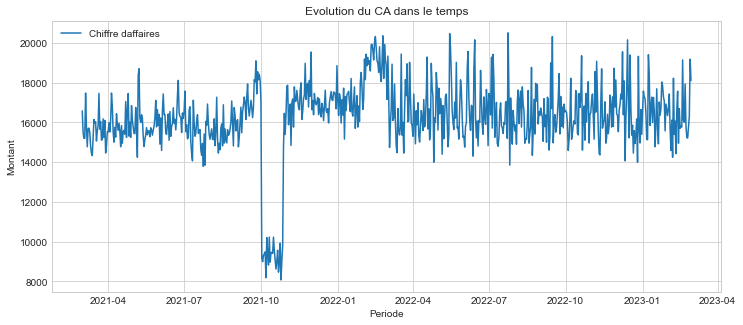

In [47]:
# Evolution du CA dans le temps 
plt.figure( figsize = ( 12, 5)) 
plt.title('Evolution du CA dans le temps') 
sns.lineplot( x = 'date_2', 
             y = 'ca', 
             data = ca_annee2, 
             label = 'Chiffre d''affaires') 
  
plt.xlabel('Periode') 

plt.ylabel('Montant') 
plt.savefig("g1.png")

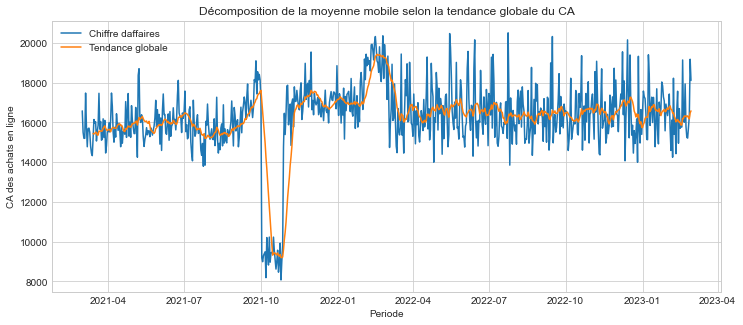

In [48]:
# Calcul de la tendance globale du CA
ca_annee2['tendance_globale'] = ca_annee2.ca.rolling(14).mean() 

# Mise en place de la décomposition moyenne mobile pour évaluer la tendance globale du CA
plt.figure( figsize = ( 12, 5)) 
plt.title('Décomposition de la moyenne mobile selon la tendance globale du CA')  
sns.lineplot( x = 'date_2', 
             y = 'ca', 
             data = ca_annee2, 
             label = 'Chiffre d''affaires') 
  
sns.lineplot( x = 'date_2', 
             y = 'tendance_globale', 
             data = ca_annee2, 
             label = 'Tendance globale') 
  
plt.xlabel('Periode')    
plt.ylabel('CA des achats en ligne') 
plt.savefig("g2.png")

On découvre une baisse inquiétante du chiffre d'affaire en Octobre 2021. On va donc investiguer auprès des collaborateurs afin de savoir s'il y a eu un évènement particulier à cette date.

In [49]:
# Zoom sur la période d'octobre 2021
tab['date_2'] = pd.to_datetime(tab['date_2'], format='%Y-%m-%d')
filtered_tab = tab.loc[(tab['date_2'] >= '2021-09-30')
                     & (tab['date'] < '2021-11-01')]

In [50]:
# Creation des tables en fonction des catégories

cat = filtered_tab[["categ", "price", "date_2"]]
cat = pd.pivot_table(cat, index=["date_2"], columns=["categ"], aggfunc=["sum", "count"]).reset_index()
cat.columns = ["date_2", "ca_categ_0", "ca_categ_1", "ca_categ_2", "nbre_de_vente_categ_0", "nbre_de_vente_categ_1", "nbre_de_vente_categ_2"]
cat.head(15)

,date_2,ca_categ_0,ca_categ_1,ca_categ_2,nbre_de_vente_categ_0,nbre_de_vente_categ_1,nbre_de_vente_categ_2
0,2021-09-30,9973.95,6920.45,1233.61,950.0,342.0,19.0
1,2021-10-01,6950.50,7003.79,3104.05,663.0,344.0,38.0
2,2021-10-02,7141.01,NaN,2041.12,661.0,NaN,28.0
3,2021-10-03,6786.57,NaN,2206.48,648.0,NaN,31.0
4,2021-10-04,6554.86,NaN,2746.08,603.0,NaN,38.0
5,2021-10-05,6357.91,NaN,3032.55,594.0,NaN,38.0
6,2021-10-06,7546.58,NaN,1944.11,702.0,NaN,26.0
7,2021-10-07,6404.01,NaN,1787.07,597.0,NaN,26.0
8,2021-10-08,7069.53,NaN,3137.82,669.0,NaN,44.0
9,2021-10-09,6808.69,NaN,2616.67,640.0,NaN,35.0


Dans ce tableau on peu voir qu'il n'y a pas eu de vente de la catégorie n°1 entre le 2021-10-02 et le 2021-10-27. 

Text(0.5, 1.0, 'Evolution journalière des ventes par catégorie')

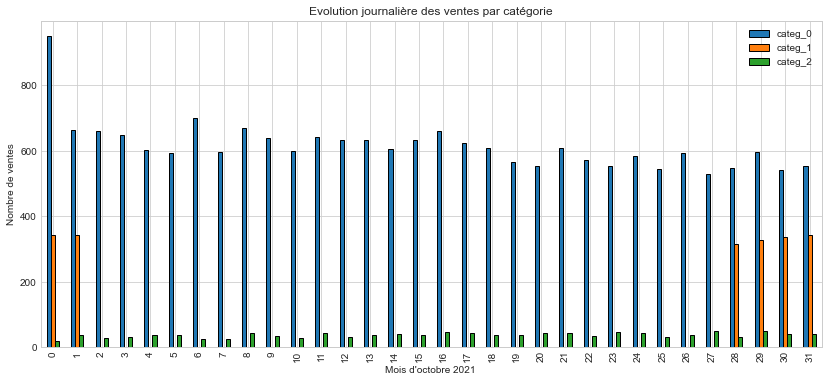

In [51]:
# Graphique 
cat[["nbre_de_vente_categ_0", "nbre_de_vente_categ_1", "nbre_de_vente_categ_2"]].plot.bar(figsize=(14,6), edgecolor = "black", linewidth = 1)
plt.legend(["categ_0", "categ_1", "categ_2"])
plt.xlabel("Mois d'octobre 2021 ")
plt.ylabel("Nombre de ventes")
plt.title("Evolution journalière des ventes par catégorie")

La chute du chiffre d'affaire en octobre correspond bien au faite qu'il n'y ai pas eu de produits de la catégorie 1vendus. On pourrait supposser qu'il y ait eue une rupture de stocks ou un effacement des transactions. 

<AxesSubplot:title={'center':'Montant des achats selon l age et le sexe'}, xlabel='age', ylabel='price'>

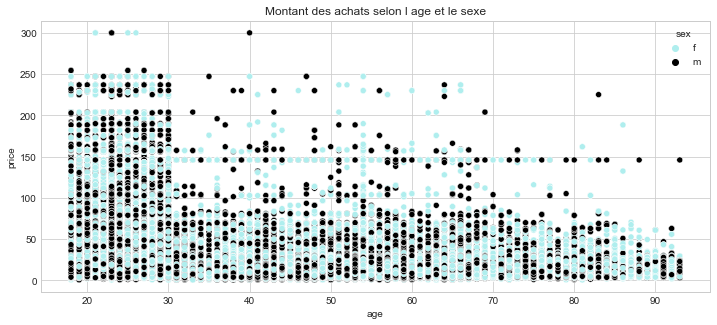

In [52]:
# Montant des achats selon l'age et le sexe
plt.figure( figsize = ( 12, 5)) 
plt.title('Montant des achats selon l age et le sexe')
sns.scatterplot(data=tab, x='age', y='price', hue='sex', palette=['paleturquoise','black'])

Dans le graphique ci-dessus, on remarque que les 18-30 ans et plus particulièrement les femmes sont celles  qui dépensent le plus, soit plus de 300€ en moyenne.

In [53]:
# Moyenne d'achat selon le sexe
moyenne_achat_sexe_age=tab.groupby(['categ','sex'])['age'].mean()
moyenne_achat_sexe_age

categ  sex
0      f      44.257550
       m      43.543249
1      f      48.362318
       m      46.923506
2      f      26.571255
       m      25.387031
Name: age, dtype: float64

<AxesSubplot:title={'center':'Montant des achats selon l age et la catégorie'}, xlabel='age', ylabel='price'>

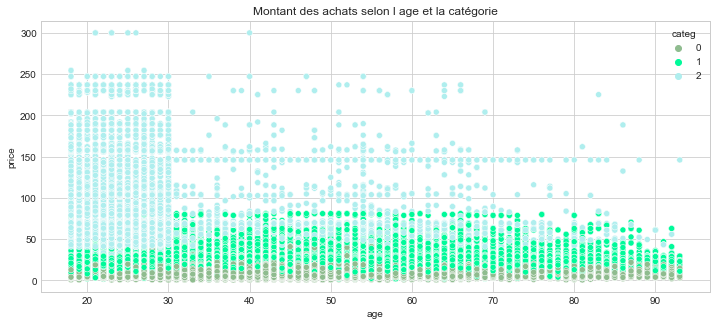

In [54]:
# Montant des achats selon l'age et la catégorie
plt.figure( figsize = ( 12, 5)) 
plt.title('Montant des achats selon l age et la catégorie')
sns.scatterplot(data=tab, x='age', y='price', hue='categ', palette=["darkseagreen", "mediumspringgreen", "paleturquoise"])


In [55]:
# TOPS et FLOPS

vte_ref = transactions.groupby(["id_prod"])["session_id"].count()

print("Produits les plus vendus")
print(vte_ref.nlargest(5))
print("Produits les moins vendus")
print(vte_ref.nsmallest(5))

Produits les plus vendus
id_prod
1_369    2252
1_417    2189
1_414    2180
1_498    2128
1_425    2096
Name: session_id, dtype: int64
Produits les moins vendus
id_prod
0_1151    1
0_1284    1
0_1379    1
0_1498    1
0_1539    1
Name: session_id, dtype: int64


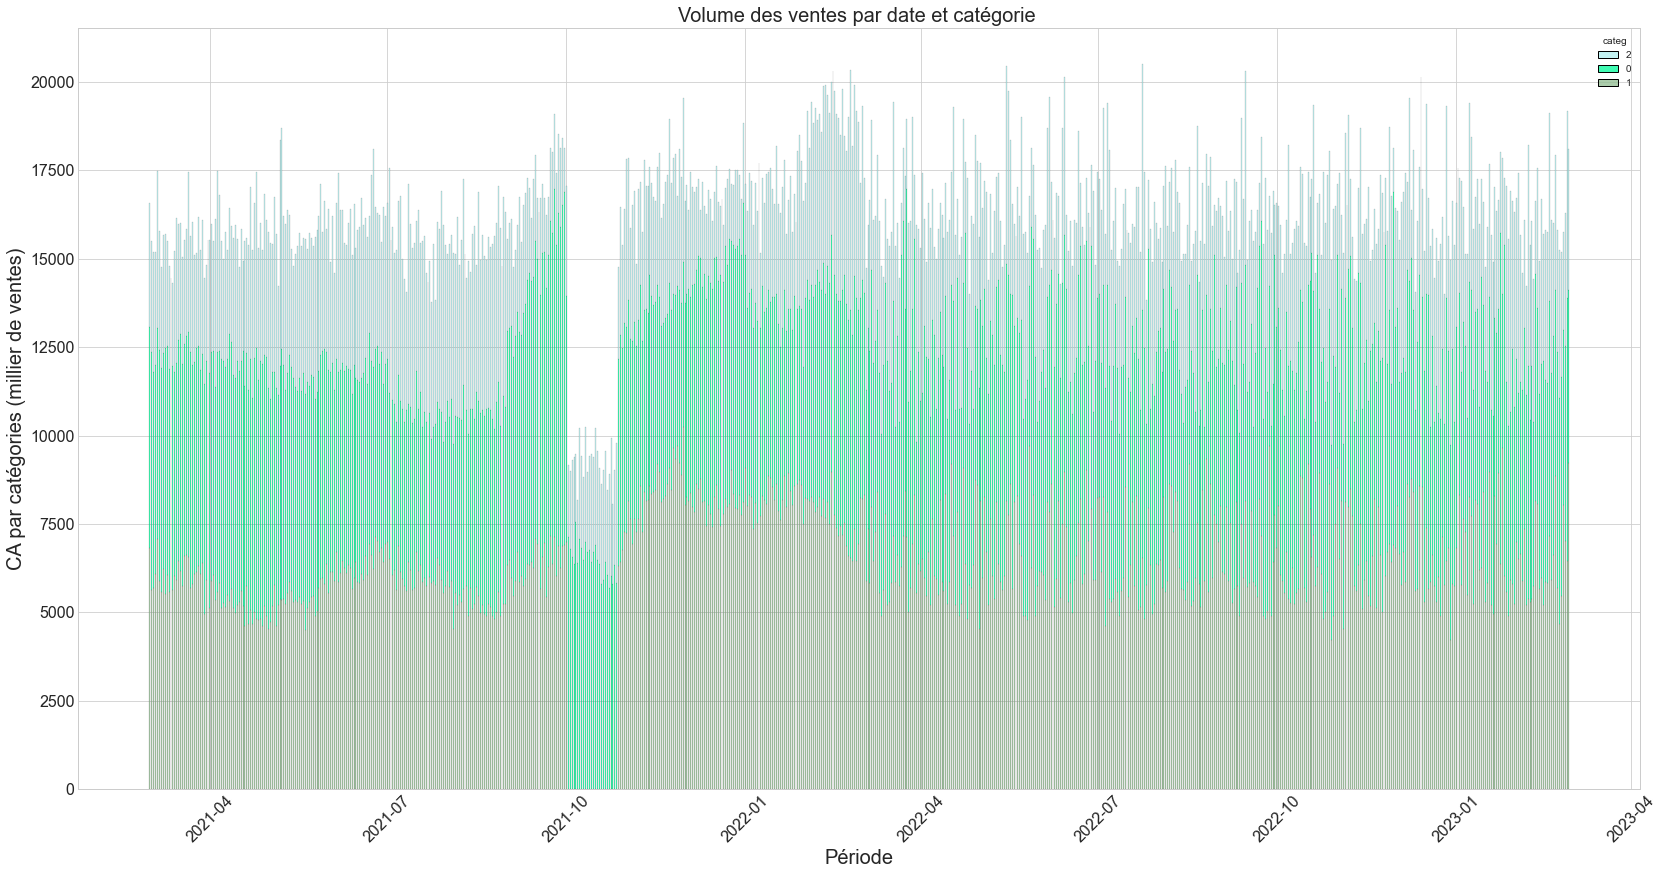

In [56]:
#Volume des ventes par date et catégorie 
fig, ax = plt.subplots(figsize=(28, 14))

ax = sns.histplot(
    data=tab,
    x="date_2",
    hue="categ",
    weights="price",
    multiple="stack",
    discrete= 1,
    shrink=0.5,
    hue_order=tab.groupby("categ").price.sum().sort_values().index,
    palette=["paleturquoise", "mediumspringgreen", "darkseagreen"])

ax.set_title("Volume des ventes par date et catégorie ", fontsize = 20)
ax.set_ylabel("CA par catégories (millier de ventes)", fontsize = 20)
ax.set_xlabel("Période", fontsize = 20)
ax.tick_params(axis='x', labelsize=16, rotation = 45) 
ax.tick_params(axis='y', labelsize=16) 

legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))

montant total des achats par genre:
 sex
f    5.860927e+06
m    5.995151e+06
Name: price, dtype: float64
nombre total d'achats par genre:
 sex
f    338402
m    340930
Name: price, dtype: int64
montant moyen des achats par genre:
 sex
f    17.319421
m    17.584698
Name: price, dtype: float64


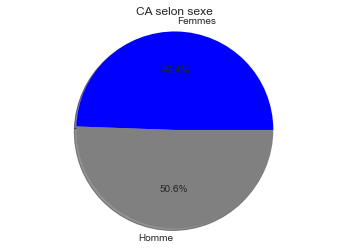

In [57]:
# Depenses par sexes:
rep_achat = tab.groupby(["sex"])["price"].sum()
print("montant total des achats par genre:\n", rep_achat)

nbr_achat = tab.groupby(["sex"])["price"].count()
print("nombre total d'achats par genre:\n", nbr_achat)

moy_achat = tab.groupby(["sex"])["price"].mean()
print("montant moyen des achats par genre:\n", moy_achat)


# Graphique:
fig3, ax3 = plt.subplots()
ax3.pie(rep_achat,
        labels=["Femmes","Homme"],
        autopct="%1.1f%%",
        colors=["blue","grey"],
        shadow=True)
ax3.axis("equal")
plt.title("CA selon sexe")
plt.show()

sex
f    4490
m    4131
Name: client_id, dtype: int64


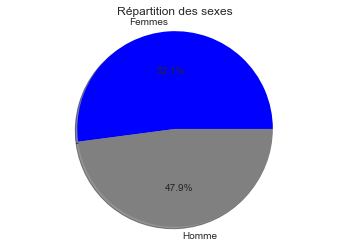

In [58]:
# Repartition des sexes :
rep = customers.groupby(["sex"])["client_id"].count()
print(rep)

# Graphique:
fig2, ax2 = plt.subplots()
ax2.pie(rep,
        labels=["Femmes","Homme"],
        autopct="%1.1f%%",
        colors=["blue","grey"],
        shadow=True)
ax2.axis("equal")
plt.title("Répartition des sexes")
plt.show()

In [59]:
# Top clients:
top_clt = tab.groupby(["client_id"])["price"].sum()
# flop clients:
flop_clt = tab.groupby(["client_id"])["price"].sum()

print("Top 5 clients")
print(top_clt.nlargest(5))

print("Flop 5  clients")
print(top_clt.nsmallest(5))

Top 5 clients
client_id
c_1609    324033.35
c_4958    289760.34
c_6714    153662.70
c_3454    113669.82
c_3263      5276.87
Name: price, dtype: float64
Flop 5  clients
client_id
c_8351     6.31
c_8140     8.30
c_8114     9.98
c_240     11.06
c_4648    11.20
Name: price, dtype: float64


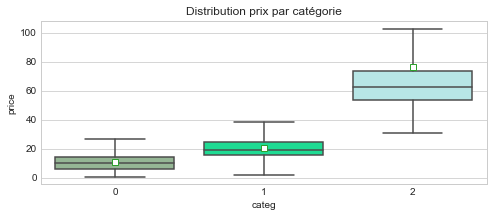

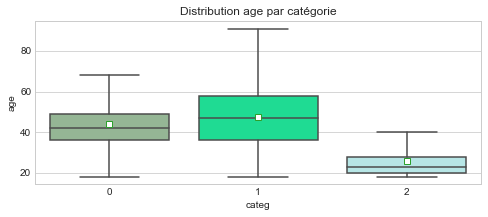

In [60]:
#Distribution de prix par catégories

plt.figure(figsize=(8,3))
sns.boxplot(data=tab, x='categ', y='price', showfliers=False, showmeans=True, palette=["darkseagreen", "mediumspringgreen", "paleturquoise"], meanprops={"marker":"s","markerfacecolor":"white"})
plt.title('Distribution prix par catégorie')

#Distribution de prix par age

plt.figure(figsize=(8,3))
sns.boxplot(data=tab, x='categ', y='age', showfliers=False, showmeans=True, palette=["darkseagreen", "mediumspringgreen", "paleturquoise"], meanprops={"marker":"s","markerfacecolor":"white"})
plt.title('Distribution age par catégorie')

plt.show()


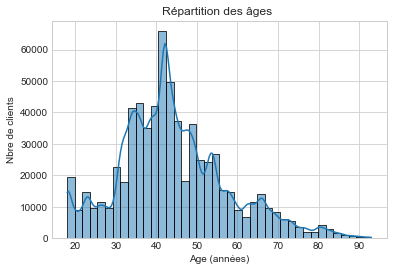

In [61]:
#Répartition par ages 
sns.histplot(data=tab["age"],
             bins=40,
             kde=True)
plt.title("Répartition des âges ")
plt.ylabel("Nbre de clients")
plt.xlabel("Age (années)")
plt.show()


# **<span style='color:blue'>III. TESTS DE CORELATION </span>**

L Indice de Gini est : 0.694


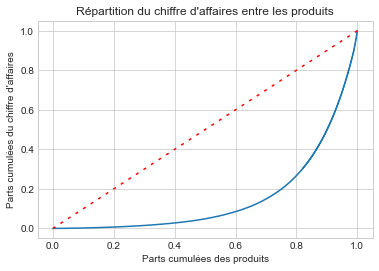

In [62]:
# Calcul de la courbe de Lorenz et du coefficient de GINI 
lorenz_CA_prod = np.cumsum(np.sort(vte_ref)) / vte_ref.sum()
lorenz_CA_prod = np.append([0], lorenz_CA_prod)
plt.plot(np.linspace(0,1,len(lorenz_CA_prod)), lorenz_CA_prod, drawstyle='steps-post'),
plt.plot(np.linspace(0,1,len(lorenz_CA_prod)), np.linspace(0,1,len(lorenz_CA_prod)),color ="red", dashes=[2,4])
plt.ylabel("Parts cumulées du chiffre d'affaires")
plt.xlabel("Parts cumulées des produits")
plt.title("Répartition du chiffre d'affaires entre les produits")
aire_ss_courbe_CA_prod = lorenz_CA_prod[:-1].sum() / len(lorenz_CA_prod)
S_ca_prod = 0.5 - aire_ss_courbe_CA_prod
gini_CA_prod = 2* S_ca_prod
print("L Indice de Gini est :",round(gini_CA_prod,3))

L'indice de Gini s'éloigne de 0, en ce sens, on peut dire que  le poids des produits dans le chiffre d'affaires global est donc très inégal. Soit, 80% des produits participent à environ 30 % du CA.

Le top client peut être un professionnel, par exemple une école.

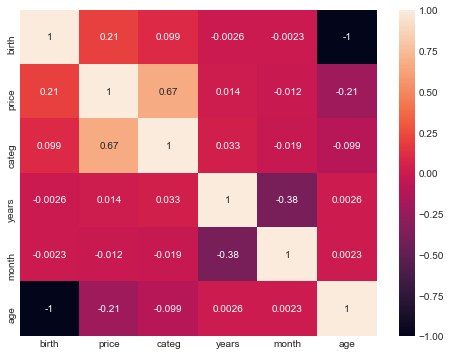

In [94]:
## Pour comprendre et analyser nous allons utiliser La heatmap pour avoir quelques pistes  pistes concrètes
#Coefficient  de corélation linéaire 
corr_tab = tab.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_tab, annot=True)
plt.show()

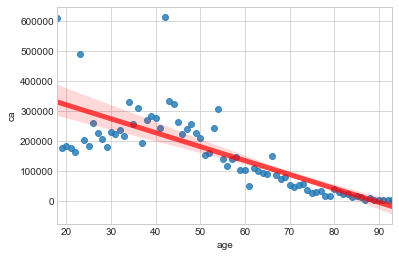

(None,
     age         ca
 0    18  609013.69
 1    19  178195.78
 2    20  184209.24
 3    21  178497.70
 4    22  165029.24
 ..  ...        ...
 71   89    5264.98
 72   90    5043.19
 73   91    2815.45
 74   92    4013.87
 75   93    3221.85
 
 [76 rows x 2 columns])

In [64]:
#corélation linéaire entre les ages et montant total d'achat
ca_age=tab.groupby(['age']).agg({'price':'sum'})
ca_age=ca_age.reset_index()
ca_age.rename(columns={'price':'ca'}, inplace=True)

#Coefficient  de corélation linéaire entre les ages et montant total d'achat 
sns.regplot(x=ca_age["age"], y=ca_age["ca"],line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show(),ca_age

# Lien entre le sexe et la catégorie : Chi2
HO = les deux variables sont indépendantes
H1 = il existe une relation entre les deux variables
alpha= 5%

Règle de décision: 
Si chi2 calculé est supérieur à chi2 théorique, alors on rejette H0
Si chi2 calculé est inférieur à chi2 théorique alors on accepte H0

In [65]:
cont = tab[['sex','categ']].pivot_table(index='sex',columns='categ',aggfunc=len,margins=True,margins_name="Total")
cont

categ,0,1,2,Total
sex,,,,
f,206220,114899,17283,338402
m,209460,112270,19200,340930
Total,415680,227169,36483,679332


In [93]:
# Lien entre le sexe et la catégorie : Chi2
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(tab)
indep = tx.dot(ty) / n


c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum() #chi2 calculé
ddl=(2-1)*(3-1)#nombre de degré de liberté
xi_n,ddl

(147.00253568681114, 2)

# Conclusion:
    
Le chi2 calculé (147) est supérieur au chi2 théorique (5.99), pour un ddl = 2 et alpha=5%.
Donc on rejette H0.
Il existe donc une  relation entre les deux variables.

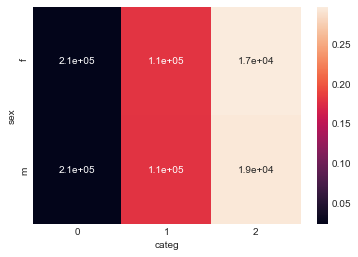

In [67]:
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

Ce graphique nous indique que le sexe du client n'influence pas la catégorie de livre achetée  sauf pour la catégorie 2 ou il y a une légère différence. 

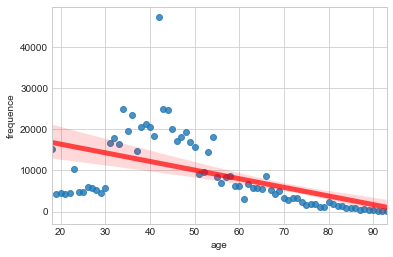

(None,
     age  frequence
 0    18      15149
 1    19       4371
 2    20       4587
 3    21       4252
 4    22       4415
 ..  ...        ...
 71   89        327
 72   90        311
 73   91        170
 74   92        226
 75   93        201
 
 [76 rows x 2 columns])

In [68]:
#fréquence d'achat selon l'âge

fq_achat_age=tab.groupby(['age']).agg({'session_id':'count'})
fq_achat_age=fq_achat_age.reset_index()
fq_achat_age.rename(columns={'session_id':'frequence'}, inplace=True)
fq_achat_age

sns.regplot(x=fq_achat_age["age"], y=fq_achat_age["frequence"],line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show(),fq_achat_age

In [69]:
fq_achat_age.corr(method='pearson')

,age,frequence
age,1.000000,-0.533705
frequence,-0.533705,1.000000


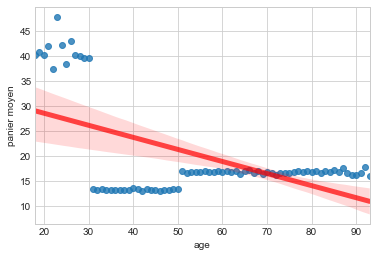

(None,
     age  panier moyen
 0    18     40.201577
 1    19     40.767737
 2    20     40.158980
 3    21     41.979704
 4    22     37.379216
 ..  ...           ...
 71   89     16.100856
 72   90     16.216045
 73   91     16.561471
 74   92     17.760487
 75   93     16.029104
 
 [76 rows x 2 columns])

In [70]:
#panier moyen selon l'âge
panier_moyen_age=tab.groupby(['age']).agg({'price':'mean'})
panier_moyen_age=panier_moyen_age.reset_index()
panier_moyen_age.rename(columns={'price':'panier moyen'}, inplace=True)

sns.regplot(x=panier_moyen_age["age"], y=panier_moyen_age["panier moyen"],line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show(),panier_moyen_age

In [71]:
#Création de classes d'ages pour effectuer un test ANOVA
tab['tranche'] = pd.cut(x=tab['age'], bins=[18,30,45,65,80,100])
tab

,id_prod,date,session_id,client_id,sex,birth,price,categ,date_2,time,years,month,month_year,age,tranche
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,4.18,0,2022-05-20,13:21:29.043970,2022,5,05-2022,36,"(30, 45]"
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,15.99,1,2022-02-02,07:55:19.149409,2022,2,02-2022,34,"(30, 45]"
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,7.99,0,2022-06-18,15:44:33.155329,2022,6,06-2022,54,"(45, 65]"
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,69.99,2,2021-06-24,04:19:29.835891,2021,6,06-2021,22,"(18, 30]"
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,4.99,0,2023-01-11,08:22:08.194479,2023,1,01-2023,42,"(30, 45]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,f,1951,12.99,0,2022-01-15,13:05:06.246925,2022,1,01-2022,71,"(65, 80]"
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,f,1977,10.99,1,2022-03-19,16:03:23.429229,2022,3,03-2022,45,"(30, 45]"
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,f,1988,12.99,0,2022-12-20,04:33:37.584749,2022,12,12-2022,34,"(30, 45]"
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,m,1986,4.98,0,2021-07-16,20:36:35.350579,2021,7,07-2021,36,"(30, 45]"


# Lien entre Fréquence d'achat et l'âge: ANNOVA
HO = les deux variables sont indépendantes,
H1 = il existe une relation entre les deux variables
alpha= 5%

Règle de décision: 
Si F calculé est supérieur à F théorique, alors on rejette H0,
Si F calculé est inférieur à F théorique alors on accepte H0

In [72]:
#fréquence d'achat selon l'âge

fq_achat_age=tab.groupby(['client_id','tranche']).agg({'session_id':'count'})
fq_achat_age=fq_achat_age.reset_index()
fq_achat_age.rename(columns={'session_id':'frequence'}, inplace=True)
fq_achat_age


,client_id,tranche,frequence
0,c_1,"(18, 30]",0
1,c_1,"(30, 45]",0
2,c_1,"(45, 65]",0
3,c_1,"(65, 80]",39
4,c_1,"(80, 100]",0
...,...,...,...
42995,c_999,"(18, 30]",0
42996,c_999,"(30, 45]",0
42997,c_999,"(45, 65]",46
42998,c_999,"(65, 80]",0


In [73]:
annova_fq= smf.ols('frequence ~ tranche', data=fq_achat_age).fit()
sm.stats.anova_lm(annova_fq)

,df,sum_sq,mean_sq,F,PR(>F)
tranche,4.0,8.441538e+06,2.110385e+06,103.858541,3.451884e-88
Residual,42995.0,8.736497e+08,2.031980e+04,NaN,NaN


# Conclusion:
    
La statistique de test calculé (103) est supérieur à la statistique de test théorique (2.38) lue sur la table de Fischer, pour v1= p-1 = 4 et v2 = n-p = 42995, et alpha=5%, on rejette donc  H0.
Il existe donc une  relation entre les deux variables.

# Lien entre le panier moyen et l'âge: ANNOVA
Panier moyen:  nombre moyen d'articles présents dans un panier. 

HO = les deux variables sont indépendantes
H1 = il existe une relation entre les deux variables
alpha= 5%

Règle de décision: 
Si F calculé est supérieur à F théorique, alors on rejette H0
Si F calculé est inférieur à F théorique alors on accepte H0

In [74]:
#panier moyen selon l'âge
panier_moyen_age=tab.groupby(['session_id','tranche']).agg({'id_prod':'count'})
panier_moyen_age=panier_moyen_age.reset_index()
panier_moyen_age.rename(columns={'id_prod':'pm'}, inplace=True)
panier_moyen_age

,session_id,tranche,pm
0,s_1,"(18, 30]",0
1,s_1,"(30, 45]",0
2,s_1,"(45, 65]",1
3,s_1,"(65, 80]",0
4,s_1,"(80, 100]",0
...,...,...,...
1711570,s_99998,"(18, 30]",0
1711571,s_99998,"(30, 45]",3
1711572,s_99998,"(45, 65]",0
1711573,s_99998,"(65, 80]",0


In [80]:
annova_panier_moyen= smf.ols('pm ~ tranche', data=panier_moyen_age).fit()
sm.stats.anova_lm(annova_panier_moyen)

,df,sum_sq,mean_sq,F,PR(>F)
tranche,4.0,2.120773e+05,53019.317632,65176.44283,0.0
Residual,1711570.0,1.392317e+06,0.813474,NaN,NaN


# Conclusion:
La statistique de test calculé (65176.44) est supérieure à la statistique de test théorique (2.38) lue sur la table de Fischer, pour v1= p-1 = 4 et v2 = n-p = 1711570, et alpha=5%, on rejette donc  H0.
Il existe donc une  relation entre les deux variables.

# Lien entre la catégorie  et l'âge: ANNOVA
HO = les deux variables sont indépendantes
H1 = il existe une relation entre les deux variables
alpha= 5%

Règle de décision: 
Si F calculé est supérieur à F théorique, alors on rejette H0
Si F calculé est inférieur à F théorique alors on accepte H0

In [91]:
categ_a=tab.groupby(['categ','id_prod']).agg({'age':'mean'})
categ_a=categ_age.reset_index()
categ_a

,index,id_prod,categ,age
0,0,0_0,0,44.198068
1,1,0_1,0,43.486653
2,2,0_10,0,47.454545
3,3,0_100,0,46.333333
4,4,0_1000,0,44.342593
...,...,...,...,...
3261,3261,2_95,2,32.500000
3262,3262,2_96,2,26.406355
3263,3263,2_97,2,24.923077
3264,3264,2_98,2,19.000000


In [92]:
annova_categ_age = smf.ols('age ~ categ', data=categ_a).fit()
sm.stats.anova_lm(annova_categ_age)

,df,sum_sq,mean_sq,F,PR(>F)
categ,1.0,21431.742558,21431.742558,606.95012,4.662449e-123
Residual,3264.0,115253.635158,35.310550,NaN,NaN


# Conclusion:
La statistique de test calculé (606) est supérieure à la statistique de test théorique (2.38) lue sur la table de Fischer, pour v1= p-1 = 2 et v2 = n-p = 3264, et alpha=5%, on rejette donc H0. Il existe donc une relation entre les deux variables.